
# **Hands-on 4: Logistic Regression Notebook (Tutorial)**

**Alumno: Claudio Francisco Ponce Sandoval**


---


# Fundamentos de la técnica  (breve resumen).



Logistic Regression es un algoritmo de aprendizaje supervisado utilizado principalmente para clasificación.
Sirve para predecir clases binarias (0 o 1), usando una función llamada
sigmoide que convierte cualquier número en un valor entre 0 y 1.

Se basa en ajustar los datos a una curva en forma de "S" (función sigmoide), lo que permite transformar cualquier valor de entrada en un valor entre 0 y 1, interpretado como probabilidad. Si la probabilidad es mayor a un umbral (usualmente 0.5), se clasifica como clase 1 (Positiva), de lo contrario es clase 0 (Negativa).

# Modelo Matemático.

El núcleo de la Regresión Logística es la Función Sigmoide (o logística).Primero, el modelo calcula una suma ponderada de las entradas (similar a la ecuación lineal):$$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$$Donde $x$ son las características (edad, crédito) y $\beta$ son los pesos aprendidos. Luego, este valor $z$ se pasa por la función sigmoide:$$h_\theta(x) = \sigma(z) = \frac{1}{1 + e^{-z}}$$Si $h_\theta(x) \geq 0.5$, la predicción es 1 (Cumplió).Si $h_\theta(x) < 0.5$, la predicción es 0 (No Cumplió).

# Descripción de librerías, clases, funciones

- pandas: para cargar y manipular datos en formato CSV.
- numpy: operaciones numéricas.
- matplotlib: para crear gráficos (scatter plot).
- sklearn.model_selection: para dividir datos en entrenamiento y prueba.
- sklearn.linear_model.LogisticRegression: clase que entrena el modelo.
- sklearn.metrics: funciones para evaluar el modelo (accuracy, matriz de confusión).

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv("creditos.csv")
df

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0
...,...,...,...
195,55,100000,0
196,55,523144,0
197,55,543771,0
198,56,285288,0


# Preprocesamiento


In [27]:
# Mostrar estadísticas básicas del dataset
df.describe()


,edad,credito,cumplio
count,200.000000,200.000000,200.000000
mean,37.280000,289946.670000,0.835000
std,9.148776,137945.585277,0.372112
min,18.000000,100000.000000,0.000000
25%,29.000000,172966.500000,1.000000
50%,37.500000,276234.000000,1.000000
75%,45.000000,394574.500000,1.000000
max,57.000000,596771.000000,1.000000


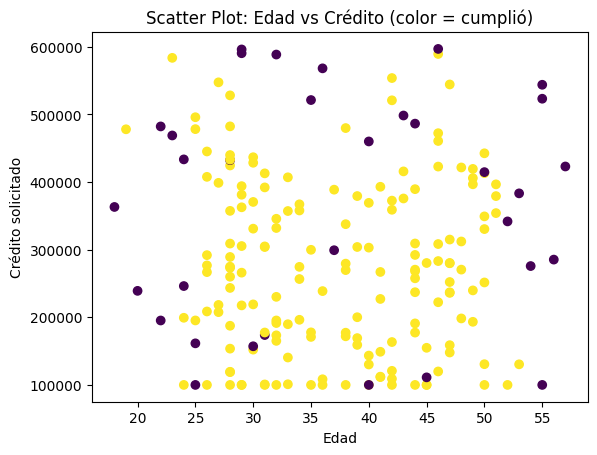

In [28]:
# GRÁFICO DE DISPERSIÓN

plt.scatter(df['edad'], df['credito'], c=df['cumplio'])
plt.xlabel("Edad")
plt.ylabel("Crédito solicitado")
plt.title("Scatter Plot: Edad vs Crédito (color = cumplió)")
plt.show()


In [29]:
# SEPARAR VARIABLES

X = df[['edad', 'credito']]   # Variables de entrada
y = df['cumplio']             # Variable objetivo

# Dividir en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ENTRENAR LOGISTIC REGRESSION

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

print("Modelo entrenado correctamente.")



Modelo entrenado correctamente.


# Función de Predicción

In [30]:
# FUNCIÓN DE PREDICCIÓN PARA UN NUEVO PATRÓN

def predecir_clase(edad, credito):

    # Recibe dos valores (edad, crédito) y regresa la clase predicha.

    entrada = np.array([[edad, credito]])  # Conversión a matriz
    prediccion = modelo.predict(entrada)[0]
    prob = modelo.predict_proba(entrada)[0][1]  # Probabilidad clase 1

    print(f"Probabilidad de cumplir: {prob:.4f} \n")
    print(f"Clase predicha (0 = No cumple, 1 = Sí cumple): {prediccion} \n\n")

    return prediccion

# Ejemplo:
predecir_clase(25, 300000)


Probabilidad de cumplir: 0.8605 

Clase predicha (0 = No cumple, 1 = Sí cumple): 1 




/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


np.int64(1)

# MODEL EVALUATION

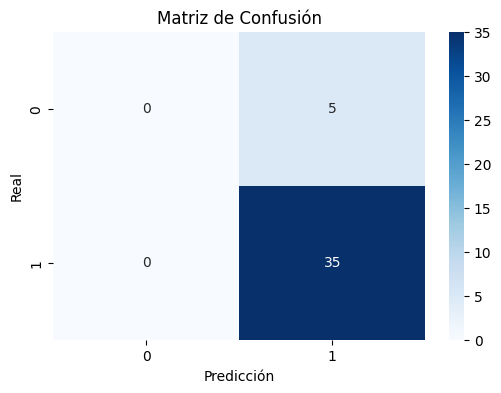


Accuracy del modelo: 0.875


In [31]:

y_pred = modelo.predict(X_test)

# Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy del modelo:", acc)
